In [1]:
from google.colab import drive  # to mount Drive to Colab notebook
import csv
import time
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Connect Google Drive to Colab
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
import joblib
%time X1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_train.joblib')
%time X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_train.joblib')
%time y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')

CPU times: user 8.39 s, sys: 619 ms, total: 9.01 s
Wall time: 8.69 s
CPU times: user 8.2 s, sys: 519 ms, total: 8.72 s
Wall time: 8.37 s
CPU times: user 6.35 ms, sys: 4.22 ms, total: 10.6 ms
Wall time: 10.9 ms
CPU times: user 3.4 ms, sys: 1.08 ms, total: 4.48 ms
Wall time: 5.03 ms


In [6]:
def train(X,y):
  modelo = DecisionTreeClassifier(random_state=0)
  modelo.fit(X,y)
  return modelo

In [7]:
%time modelo1 = train(X1_train,y1_train)

CPU times: user 48 s, sys: 21.2 ms, total: 48 s
Wall time: 47.9 s


In [8]:
joblib.dump(modelo1, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m1.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m1.joblib']

In [ ]:
import joblib
%time modelo1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m1.joblib')

CPU times: user 1.96 ms, sys: 2 ms, total: 3.96 ms
Wall time: 6.59 ms


In [ ]:
%time predictions = modelo1.predict(X1_test)

CPU times: user 2.63 s, sys: 2 ms, total: 2.64 s
Wall time: 2.64 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions)
print(f"acc: {accuracy_score(y1_test,predictions)}")
print(f"precision: {precision_score(y1_test,predictions,average='macro')}")
print(f"recall: {recall_score(y1_test,predictions,average='macro')}")
print(f"f1: {f1_score(y1_test,predictions,average='micro')}")

acc: 0.8643153921786292
precision: 0.8595450127326265
recall: 0.8602971428951658
f1: 0.8643153921786292


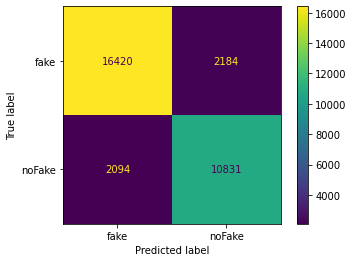

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res1,display_labels=['fake','noFake']).plot(values_format='d')

## Muestra 2


In [9]:
import joblib
%time X2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_train.joblib')
%time X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_train.joblib')
%time y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')

CPU times: user 9.29 s, sys: 562 ms, total: 9.85 s
Wall time: 9.88 s
CPU times: user 9.04 s, sys: 654 ms, total: 9.69 s
Wall time: 9.58 s
CPU times: user 12.7 ms, sys: 2.02 ms, total: 14.7 ms
Wall time: 336 ms
CPU times: user 6.3 ms, sys: 2.09 ms, total: 8.38 ms
Wall time: 233 ms


In [10]:
%time modelo2 = train(X2_train,y2_train)


CPU times: user 46.8 s, sys: 60.7 ms, total: 46.9 s
Wall time: 46.8 s


In [11]:
joblib.dump(modelo2, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m2.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m2.joblib']

In [ ]:
%time predictions2 = modelo2.predict(X2_test)

CPU times: user 2.58 s, sys: 4 ms, total: 2.58 s
Wall time: 2.58 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res2 = confusion_matrix(y2_test, predictions2)
print(f"acc: {accuracy_score(y2_test,predictions2)}")
print(f"precision: {precision_score(y2_test,predictions2,average='macro')}")
print(f"recall: {recall_score(y2_test,predictions2,average='macro')}")
print(f"f1: {f1_score(y2_test,predictions2,average='micro')}")

acc: 0.8653937644708046
precision: 0.8604186708893512
recall: 0.8620611569567411
f1: 0.8653937644708046


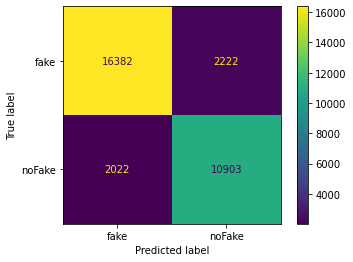

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res2,display_labels=['fake','noFake']).plot(values_format='d')

## Muestra 3


In [13]:
import joblib
%time X3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_train.joblib')
%time X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_train.joblib')
%time y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 8.82 s, sys: 545 ms, total: 9.37 s
Wall time: 9.27 s
CPU times: user 8.39 s, sys: 588 ms, total: 8.98 s
Wall time: 8.75 s
CPU times: user 10.4 ms, sys: 2.01 ms, total: 12.4 ms
Wall time: 308 ms
CPU times: user 6.81 ms, sys: 0 ns, total: 6.81 ms
Wall time: 246 ms


In [14]:
%time modelo3 = train(X3_train,y3_train)


CPU times: user 47.9 s, sys: 75.3 ms, total: 48 s
Wall time: 47.8 s


In [15]:
joblib.dump(modelo3, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m3.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m3.joblib']

In [ ]:
%time predictions3 = modelo3.predict(X3_test)

CPU times: user 2.6 s, sys: 2 ms, total: 2.6 s
Wall time: 2.6 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {accuracy_score(y3_test,predictions3)}")
print(f"precision: {precision_score(y3_test,predictions3,average='macro')}")
print(f"recall: {recall_score(y3_test,predictions3,average='macro')}")
print(f"f1: {f1_score(y3_test,predictions3,average='micro')}")

acc: 0.866503853595103
precision: 0.8618868061199001
recall: 0.8623523320414861
f1: 0.8665038535951028


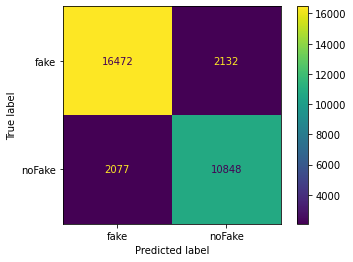

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res3,display_labels=['fake','noFake']).plot(values_format='d')

RecursionError: ignored

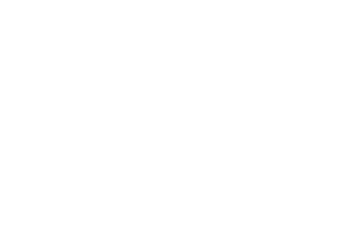

In [ ]:
from sklearn import tree
tree.plot_tree(modelo3)

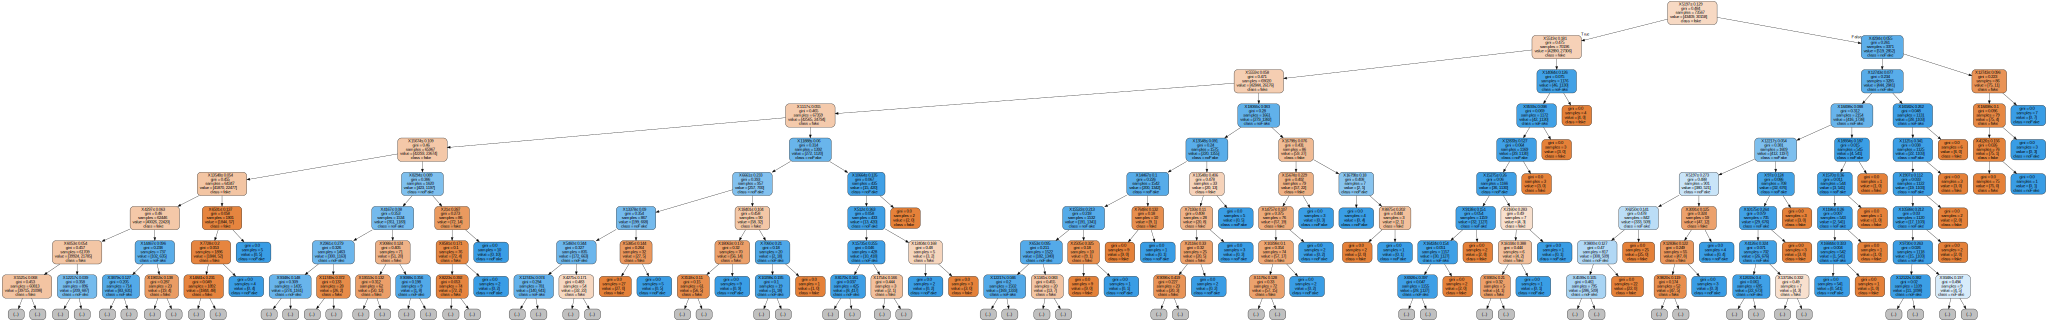

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(modelo3, out_file=None, 
                                 max_depth=8,
                                class_names=["fake","noFake"],  
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
modelo3.get_depth()

1510

# Modelo 1 Aplicado a otras muestras


In [16]:
import joblib
modelo1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m1.joblib')


In [17]:
%time X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
%time y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')
%time X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
%time y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')
%time X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
%time y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 8.36 s, sys: 747 ms, total: 9.11 s
Wall time: 8.51 s
CPU times: user 2.9 ms, sys: 2.99 ms, total: 5.89 ms
Wall time: 6.15 ms
CPU times: user 8.35 s, sys: 583 ms, total: 8.93 s
Wall time: 8.43 s
CPU times: user 4.39 ms, sys: 2.07 ms, total: 6.46 ms
Wall time: 7.35 ms
CPU times: user 8.52 s, sys: 691 ms, total: 9.21 s
Wall time: 8.71 s
CPU times: user 4.44 ms, sys: 2.08 ms, total: 6.52 ms
Wall time: 6.69 ms


In [18]:
%time predictions1 = modelo1.predict(X1_test)
%time predictions2 = modelo1.predict(X2_test)
%time predictions3 = modelo1.predict(X3_test)

CPU times: user 2.49 s, sys: 17.4 ms, total: 2.5 s
Wall time: 2.49 s
CPU times: user 1.71 s, sys: 33 ms, total: 1.74 s
Wall time: 1.74 s
CPU times: user 2.62 s, sys: 62.4 ms, total: 2.68 s
Wall time: 2.66 s


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.864 | 0.898 | 0.897
precision: 0.86 | 0.894 | 0.893 
recall: 0.86 | 0.895 | 0.894  
f1: 0.864 | 0.898 | 0.897  


# Modelo 2 Aplicado a otras muestras


In [20]:
modelo2 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m2.joblib')


In [21]:
%time predictions1 = modelo2.predict(X1_test)
%time predictions2 = modelo2.predict(X2_test)
%time predictions3 = modelo2.predict(X3_test)

CPU times: user 678 ms, sys: 9.96 ms, total: 687 ms
Wall time: 683 ms
CPU times: user 658 ms, sys: 3.71 ms, total: 662 ms
Wall time: 658 ms
CPU times: user 665 ms, sys: 2.74 ms, total: 668 ms
Wall time: 663 ms


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.895 | 0.865 | 0.895
precision: 0.892 | 0.86 | 0.892 
recall: 0.892 | 0.862 | 0.892  
f1: 0.895 | 0.865 | 0.895  


# Modelo 3 Aplicado a otras muestras


In [23]:
modelo3 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m3.joblib')


In [24]:
%time predictions1 = modelo3.predict(X1_test)
%time predictions2 = modelo3.predict(X2_test)
%time predictions3 = modelo3.predict(X3_test)

CPU times: user 686 ms, sys: 3.91 ms, total: 690 ms
Wall time: 685 ms
CPU times: user 665 ms, sys: 5.91 ms, total: 671 ms
Wall time: 666 ms
CPU times: user 666 ms, sys: 6.92 ms, total: 673 ms
Wall time: 669 ms


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.902 | 0.9 | 0.867
precision: 0.899 | 0.896 | 0.862 
recall: 0.898 | 0.897 | 0.862  
f1: 0.902 | 0.9 | 0.867  
